In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
mnist_data=pd.read_csv(r'C:\Users\gsatu\Downloads\archive (2)\mnist_train.csv')
mnist_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data=mnist_data.values
X=data[:,1:]
Y=data[:,0]



## predict image using KNN

In [8]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X, Y, queryPoint, k=10):
    distances = []
    m=len(X)
    for i in range(m):
        distance = dist(X[i],queryPoint)
        distances.append((distance, Y[i]))
    distances = sorted(distances)
    distances = distances[:k]
    vals = np.asarray(distances)
    new_vals = np.unique(vals[:,1], return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]

    return pred

In [9]:
def draw_image(X,Y,i):
        plt.imshow(X[i].reshape(28,28),cmap='gray')
        plt.title(label="lable:"+str(Y[i]))
        plt.show()

def show_pred(i):
    prediction=knn(X,Y,X[i])
    return prediction
    
    

3.0


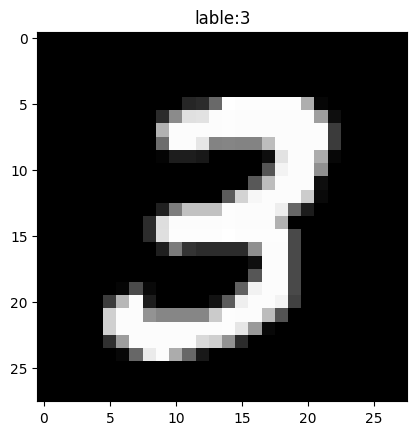

In [10]:
print(show_pred(7))
draw_image(X,Y,7)

## Compute the accuracy of the model

In [11]:
mnist_test_data=pd.read_csv(r'C:\Users\gsatu\Downloads\archive (2)\mnist_test.csv')
mnist_test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_data=mnist_test_data.values
test_X=test_data[:,1:]
test_Y=test_data[:,0]

n=test_X.shape[0]

# print(n)

sum=0

for i in range(n):
    print(sum/(i+1))
    if(test_Y[i]==knn(test_X,test_Y,test_X[i])):
        sum+=1

print(sum/10000)        
        


0.0
0.5
0.6666666666666666
0.75
0.8
0.8333333333333334
0.8571428571428571
0.875
0.8888888888888888
0.9
0.9090909090909091
0.9166666666666666
0.9230769230769231
0.9285714285714286
0.9333333333333333
0.9375
0.9411764705882353
0.9444444444444444
0.9473684210526315
0.95
0.9523809523809523
0.9545454545454546
0.9565217391304348
0.9583333333333334
0.96
0.9615384615384616
0.9629629629629629
0.9642857142857143
0.9655172413793104
0.9666666666666667
0.967741935483871
0.96875
0.9696969696969697
0.9705882352941176
0.9714285714285714
0.9722222222222222
0.972972972972973
0.9736842105263158
0.9743589743589743
0.975
0.975609756097561
0.9761904761904762
0.9767441860465116
0.9772727272727273
0.9555555555555556
0.9565217391304348
0.9574468085106383
0.9583333333333334
0.9591836734693877
0.96
0.9607843137254902
0.9615384615384616
0.9622641509433962
0.9629629629629629
0.9636363636363636
0.9642857142857143
0.9649122807017544
0.9655172413793104
0.9661016949152542
0.9666666666666667
0.9672131147540983
0.9677419

KeyboardInterrupt: 

### AQURACCY: ~93.37%